In [1]:
## testing the propagation frunction

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [2]:
file = r"C:\Users\IT\Documents\UCL\FSPSimulator\src\fspsim\data\results\propagated_catalogs\oneweb_starlink.pickle"

with open(file, 'rb') as f:
    data = pickle.load(f)

The EOP file 'finals2000A.all' in C:\Users\IT/src/iers/ is already the latest.
The Leap Second file 'Leap_Second.dat' in C:\Users\IT/src/iers/ is already the latest.


In [3]:
# see the headings of each object within the data
print(data[0].__dict__.keys())

dict_keys(['launch_date', 'decay_date', 'rso_name', 'rso_type', 'payload_operational_status', 'object_type', 'application', 'operator', 'characteristic_length', 'characteristic_area', 'mass', 'source', 'launch_site', 'maneuverable', 'spin_stabilized', 'apogee', 'perigee', 'propulsion_type', 'epoch', 'day_of_year', 'station_keeping', 'ephemeris', 'sma', 'orbital_period', 'inc', 'argp', 'raan', 'tran', 'eccentricity', 'meananomaly', 'cart_state', 'C_d', 'tle'])


In [9]:
test = 

array([[[ 2.45848450e+06,  2.45848450e+06,  2.45848450e+06],
        [-4.85629140e+03,  1.43042237e+02, -4.37234627e+03],
        [ 5.12830499e+00,  1.75150823e+00, -5.64134564e+00]]])

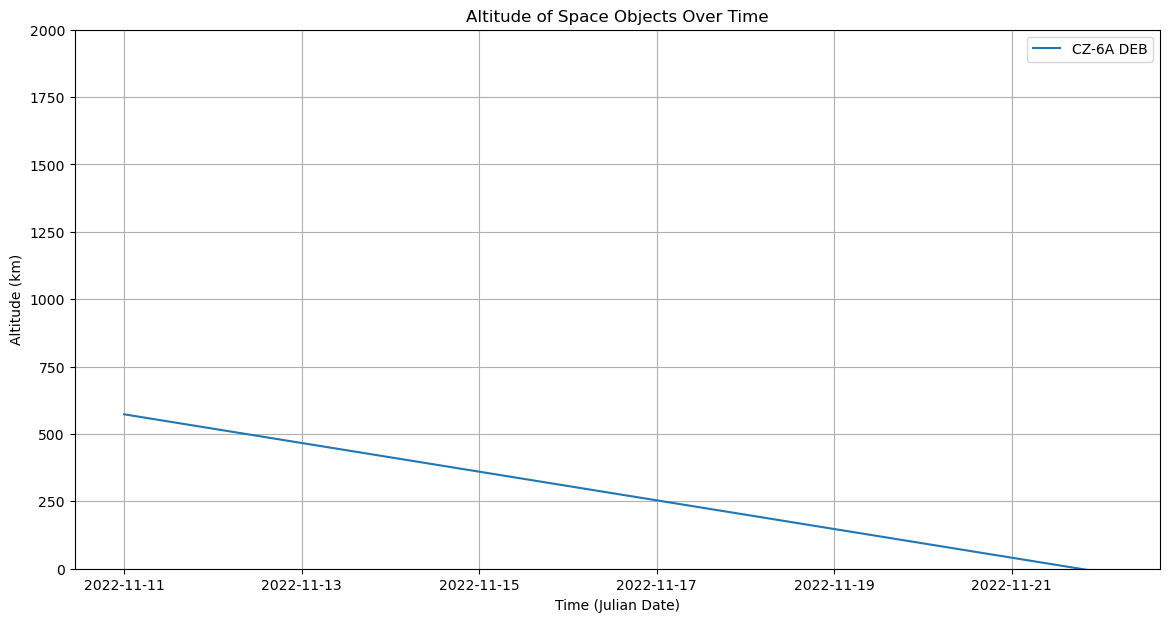

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time

# Assuming 'data' is a list of objects, and each has an 'ephemeris' attribute
# And 'rso_name' attribute is the name of the satellite

# The radius of the Earth in kilometers
earth_radius_km = 6371

# Prepare the plot
plt.figure(figsize=(14, 7))

# Plot each satellite's ephemeris as a separate line
for satellite in extracted_objects:
    # Initialize lists to hold time and altitude data for current satellite
    satellite_times = []
    satellite_altitudes = []
    
    # Go through each ephemeris entry for the satellite
    for ephemeris in satellite.ephemeris:
        # Extract the Julian date and the position vector
        julian_date = ephemeris[0][0]  # Assuming the first of the three identical Julian dates
        position = np.array(ephemeris[1])  # Position vector
        
        # Calculate the altitude as the norm of the position vector minus Earth's radius
        altitude = np.linalg.norm(position) - earth_radius_km
        
        # Append the data to the satellite's lists
        satellite_times.append(julian_date)
        satellite_altitudes.append(altitude)

    
    # Convert Julian Dates to UTC
    utc_times = Time(satellite_times, format='jd').datetime

    # Plot the satellite's ephemeris data
    plt.plot(utc_times, satellite_altitudes, label=satellite.rso_name)

# Finalize and show the plot
plt.title('Altitude of Space Objects Over Time')
plt.xlabel('Time (Julian Date)')
plt.ylim(0,2000)
plt.ylabel('Altitude (km)')
plt.grid(True)
plt.legend()  # Show legend to identify each satellite's line
plt.show()


In [34]:
# # List of rso_names of objects to extract
objects_to_extract = [
    "FENGyun 1C DEB", 
    "SL-6 DEB",
    "C2-C DEB",
    "THORAD DELTA 1 DEB",
    "ATLAS 5 CENTAUR DEB",
    "STARLINK-4788",
    "CZ-6A DEB",
    "SLS DEB"
]

cz_deb = [
    "CZ-6A DEB"]

# Extract objects from data
extracted_objects = [obj for obj in data if obj.rso_name in objects_to_extract]

# The extracted_objects list now contains the specified space objects
cz_deb = [obj for obj in data if obj.rso_name in cz_deb]

In [43]:
# print all the data in cz_deb
for i in cz_deb:
    print(i.__dict__.keys())
    print(i.object_type)
    print(i.characteristic_length)
    print(i.characteristic_area)
    print(i.mass)
    print(i.eccentricity)

dict_keys(['launch_date', 'decay_date', 'rso_name', 'rso_type', 'payload_operational_status', 'object_type', 'application', 'operator', 'characteristic_length', 'characteristic_area', 'mass', 'source', 'launch_site', 'maneuverable', 'spin_stabilized', 'apogee', 'perigee', 'propulsion_type', 'epoch', 'day_of_year', 'station_keeping', 'ephemeris', 'sma', 'orbital_period', 'inc', 'argp', 'raan', 'tran', 'eccentricity', 'meananomaly', 'cart_state', 'C_d', 'tle'])
?
1.3
3.9000000000000004
0.12479709842799291
0.0023967


In [55]:
#Looking into the area to mass ratio of everything
# open csv from file path
file = r"C:\Users\IT\Documents\UCL\FSPSimulator\src\fspsim\data\catalogue\Cleaned_All_catalogue_latest.csv"
df = pd.read_csv(file)


,CREATION_DATE,ORIGINATOR,OBJECT_NAME,MEAN_ELEMENT_THEORY,EPOCH,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,...,Status,Owner,State,Mass,Length,Diameter,ODate,PF,AF,OpOrbit
0,2004-08-15T23:35:32,18 SPCS,SPUTNIK 25,SGP4,1963-01-04T18:56:06.303839,16.451164,0.000000,64.6344,269.9540,21.8112,...,R,RVSN,SU,2000.0,9.4,2.7,1963 Jan 4,,,LLEO/I
1,2004-08-15T23:35:32,18 SPCS,SPUTNIK 25 DEB,SGP4,1963-01-09T02:01:47.480447,16.367660,0.000031,64.7474,253.0852,22.1003,...,R,OKB1,SU,1288.0,2.6,1.5,1963 Jan 7,,,LLEO/I
2,2004-08-15T23:35:32,18 SPCS,SPUTNIK 25 DEB,SGP4,1963-01-10T04:47:21.544223,16.304907,0.004279,64.7261,248.7881,0.6384,...,R,RVSN,SU,600.0,0.9,2.5,1963 Jan 7,,,LLEO/I
3,2004-08-15T23:35:32,18 SPCS,FTV 1157,SGP4,1963-01-21T09:42:42.045119,16.233697,0.006992,82.1863,114.3740,126.0046,...,AR,NRO/CIA,US,209.0,2.3,1.5,1963 Jan 17,,,LLEO/I
4,2004-08-15T23:35:32,18 SPCS,FTV 1157 DEB,SGP4,1963-01-14T02:16:11.814815,16.213332,0.005451,82.2318,122.7763,158.6213,...,R,NRO/CIA,US,0.0,0.0,0.0,1963 Jan 9,,,LLEO/I


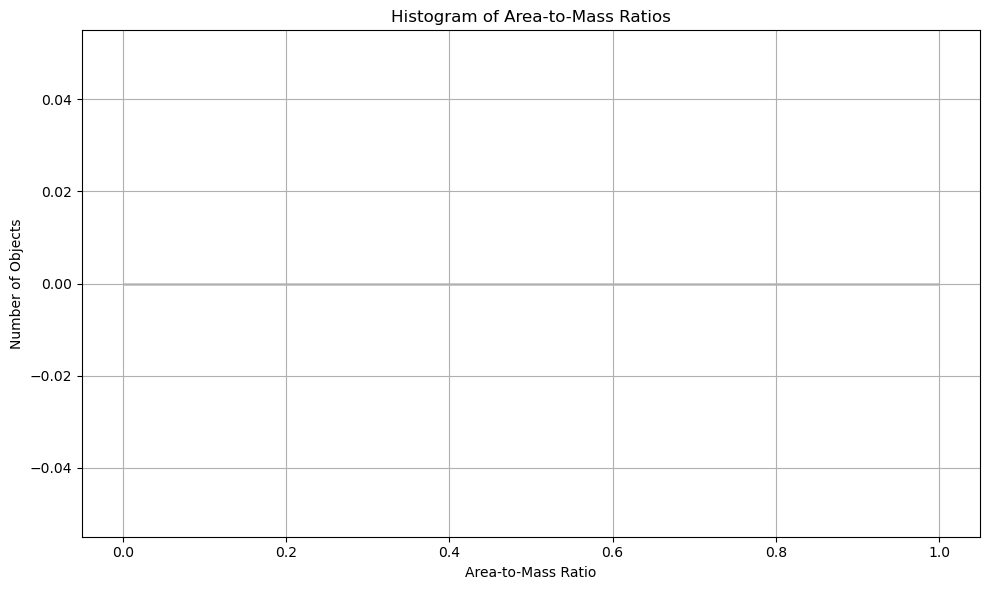

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert columns to numeric, errors='coerce' will turn non-numeric values into NaN
df['AF'] = pd.to_numeric(df['AF'], errors='coerce')
df['Mass'] = pd.to_numeric(df['Mass'], errors='coerce')

# Calculate the area-to-mass ratio
df['Area_to_Mass_Ratio'] = df['AF'] / df['Mass']

# Create a histogram
plt.figure(figsize=(10,6))
plt.hist(df['Area_to_Mass_Ratio'].dropna(), bins=50, edgecolor='k')  # dropna to remove any NaN values
plt.title('Histogram of Area-to-Mass Ratios')
plt.xlabel('Area-to-Mass Ratio')
plt.ylabel('Number of Objects')
plt.grid(True)
plt.tight_layout()
plt.show()